# 2D sinusoidal amplitude, frequency and phase estimation

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from pyestimate import sin2d_param_estimate

import numpy as np
import matplotlib.pyplot as plt

## Define a 2D sinusoidal signal, corrupted by white gaussian noise
We want to pyestimate the amplitude $A$, frequencis $f_n, f_m$ and phase $\phi$ of a sinusoidal signal corrupted by white gaussian noise $w$: <br/>
$x[n, m] = A \cos(2 \pi (f_n n + f_m m) + \phi) + w[n]$ for $n=0, 1, ..., N-1; m=0, 1, ..., M-1$ <br/>
$A > 0$, $\phi \in [-\pi, \pi]$ and $f_n, f_m$ are digital frequencies, computed as the ratio of analog frequencies to sampling frequency: $0 < f = \frac{F}{F_s} < 0.5$

In [2]:
N = 20
M = 80
fn0 = 0.089
fm0 = 0.05
A = 1.23454
phi = 0.5789
n, m = np.meshgrid(np.arange(N), np.arange(M), indexing='ij')
sigma2 = 0.2
x = A * np.cos(2*np.pi*(fn0*n+fm0*m) + phi) + np.random.default_rng(seed=0).normal(scale=np.sqrt(sigma2), size=(N,M)) # Noisy 2D sinusoid

## Estimate sinusoidal parameters and plot estimation

Estimated amplitude:  1.257 (true value:  1.235)
Estimated frequencies:  0.089,  0.050 (true values:  0.089,  0.050)
Estimated phase:  0.599 (true values:  0.579)


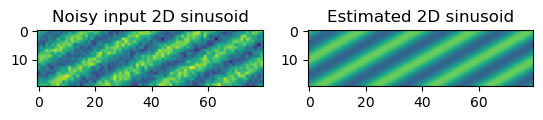

In [3]:
A_hat, f_hat, phi_hat = sin2d_param_estimate(x, brute_Ns=100) # parameters estimation
print(f'Estimated amplitude: {A_hat: .3f} (true value: {A: .3f})')
print(f'Estimated frequencies: {f_hat[0]: .3f}, {f_hat[1]: .3f} (true values: {fn0: .3f}, {fm0: .3f})')
print(f'Estimated phase: {phi_hat: .3f} (true values: {phi: .3f})')

plt.subplot(121)
plt.imshow(x, vmin=np.min(x), vmax=np.max(x))
plt.title('Noisy input 2D sinusoid')
plt.subplot(122)
plt.imshow(A_hat * np.cos(2*np.pi*(f_hat[0]*n+f_hat[1]*m) + phi_hat), vmin=np.min(x), vmax=np.max(x))
plt.title('Estimated 2D sinusoid')
plt.show()